In [1]:
# Most Important 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats

# other
import missingno as msn
import os
import joblib
import tarfile
import urllib


from sklearn import datasets

# Metrics
from sklearn.metrics import mean_squared_error, mean_squared_log_error
from sklearn.metrics import r2_score, accuracy_score

# Preprocessing & Imputing
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Validating and Tuning
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, cross_val_score 
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_predict

# Algorithms
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


## Download the Data

In [2]:
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
MYCOMPUTER_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=MYCOMPUTER_PATH):
    ''' downlaod the data from internet to specified folder
    '''
    
    # check for directory
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
        
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    
    # as it is an Archive
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()
    
fetch_housing_data(housing_url=HOUSING_URL, housing_path=MYCOMPUTER_PATH)

## Read the Data

In [3]:
def load_housing_data(computer_path=MYCOMPUTER_PATH):
    ''' this function read housing data from /datasets/housing/ folder
    '''
    
    file_path = os.path.join(computer_path, 'housing.csv')
    housing = pd.read_csv(file_path)
    
    return housing

housing_df =  load_housing_data(computer_path=MYCOMPUTER_PATH)

In [4]:
housing_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


## Look at the big Picture

In [5]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
housing_df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


ocean_values => 
 <1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64


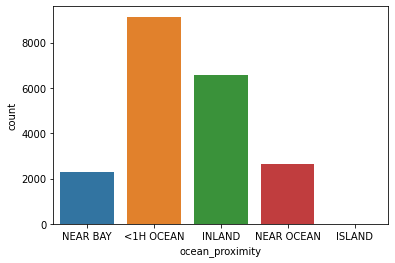

In [7]:
# seem to be biased

ocean_values = housing_df['ocean_proximity'].value_counts()
print('ocean_values => \n', ocean_values)
print('=='*20)
sns.countplot(x=housing_df['ocean_proximity']);

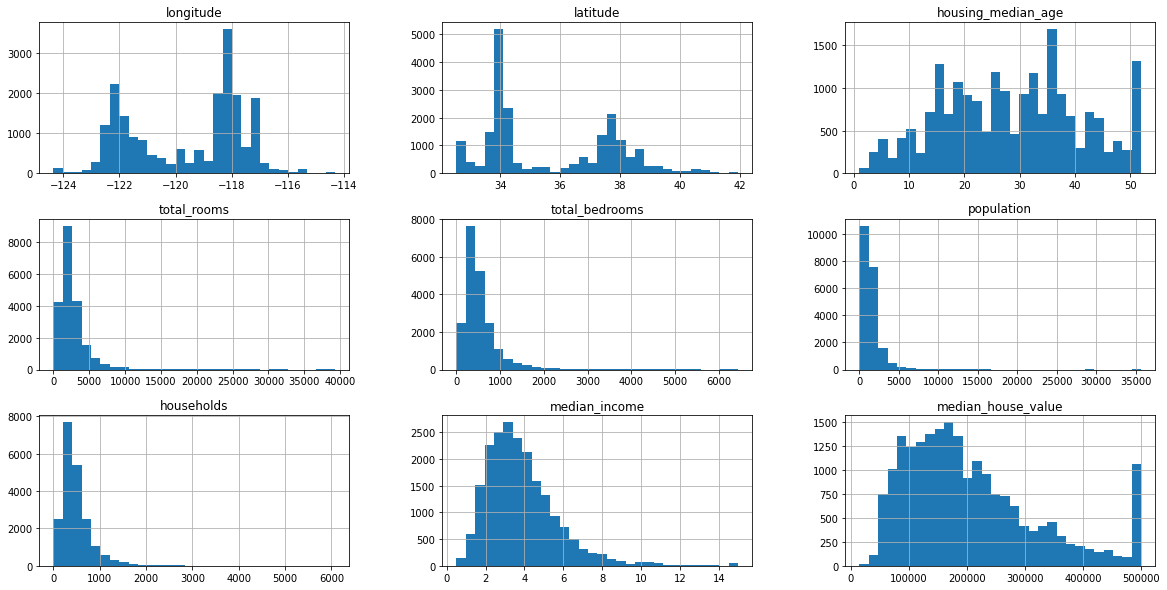

In [8]:
housing_df.hist(bins=30, figsize=(20,10));

In [9]:
corr_matrix = housing_df.corr()

corr_matrix['median_house_value'].sort_values(ascending=False)

# the most important feature is (median_income)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

## Split the Data 

try to split the data as startified sampling by split using (StratifiedShuffleSplit)
but it works in ctegorical , so try to make (median_income) as category then drop it later

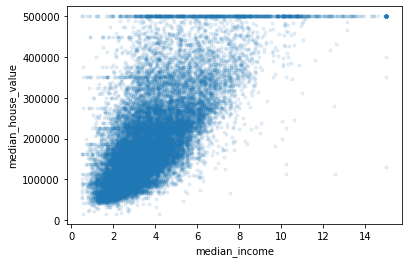

In [10]:
plt.plot(housing_df['median_income'], housing_df['median_house_value'], '.', alpha=0.1)
plt.xlabel('median_income')
plt.ylabel('median_house_value')
plt.show()

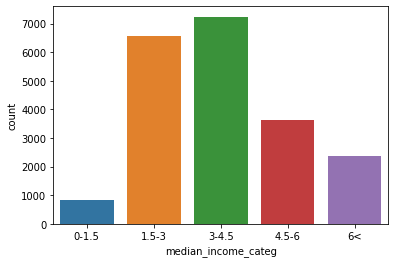

In [11]:
# try to transform to category

housing_df['median_income_categ'] = pd.cut(housing_df['median_income'], 
                            bins=[0, 1.5, 3, 4.5, 6, np.inf],
                            labels=['0-1.5', '1.5-3', '3-4.5', '4.5-6', '6<'])

sns.countplot(x=housing_df['median_income_categ']);

In [12]:
split_data = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
gen_for_indicies = split_data.split(housing_df, housing_df['median_income_categ'])

for train_idx, test_idx in gen_for_indicies:
    train_set = housing_df.iloc[train_idx]
    test_set = housing_df.iloc[test_idx]
    
print('housing_df shape =>', housing_df.shape)
print('=='*15)
print('train_set shape =>', train_set.shape) # 80 %
print('=='*15)
print('test_set shape =>', test_set.shape) # 20 %

housing_df shape => (20640, 11)
train_set shape => (16512, 11)
test_set shape => (4128, 11)


In [13]:
# test the income_medina_categorical has been distributed equally or there is a stratified sampling

### train

count_in_train_for_each_categ => 
  3-4.5    0.350594
1.5-3    0.318859
4.5-6    0.176296
6<       0.114402
0-1.5    0.039850
Name: median_income_categ, dtype: float64


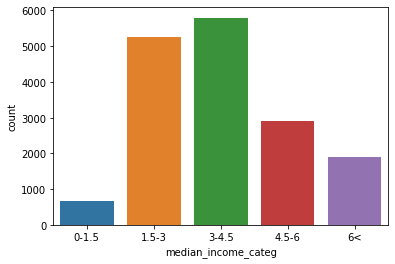

In [14]:
# for train

count_in_train_for_each_categ = train_set['median_income_categ'].value_counts(normalize=True)
print('count_in_train_for_each_categ => \n ', count_in_train_for_each_categ)

print('==='*20)

sns.countplot(x=train_set['median_income_categ']);

### test

count_in_test_for_each_categ => 
  3-4.5    0.350533
1.5-3    0.318798
4.5-6    0.176357
6<       0.114583
0-1.5    0.039729
Name: median_income_categ, dtype: float64


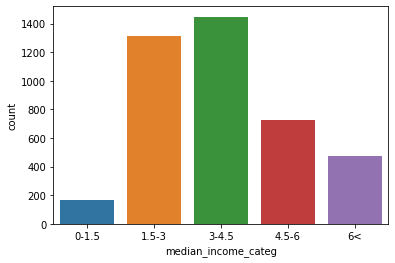

In [15]:
# for test

count_in_test_for_each_categ = test_set['median_income_categ'].value_counts(normalize=True)
print('count_in_test_for_each_categ => \n ', count_in_test_for_each_categ)

print('==='*20)

sns.countplot(x=test_set['median_income_categ']);

In [16]:
# here we achieved that we split the data in both train and test and both of the 
# are equally distributed almostly according to the most important feature i think (medina_income)

## EDA

In [17]:
# i finished from this column ... drop it
train_set = train_set.drop(columns=['median_income_categ'], axis=1)
test_set = test_set.drop(columns=['median_income_categ'], axis=1)

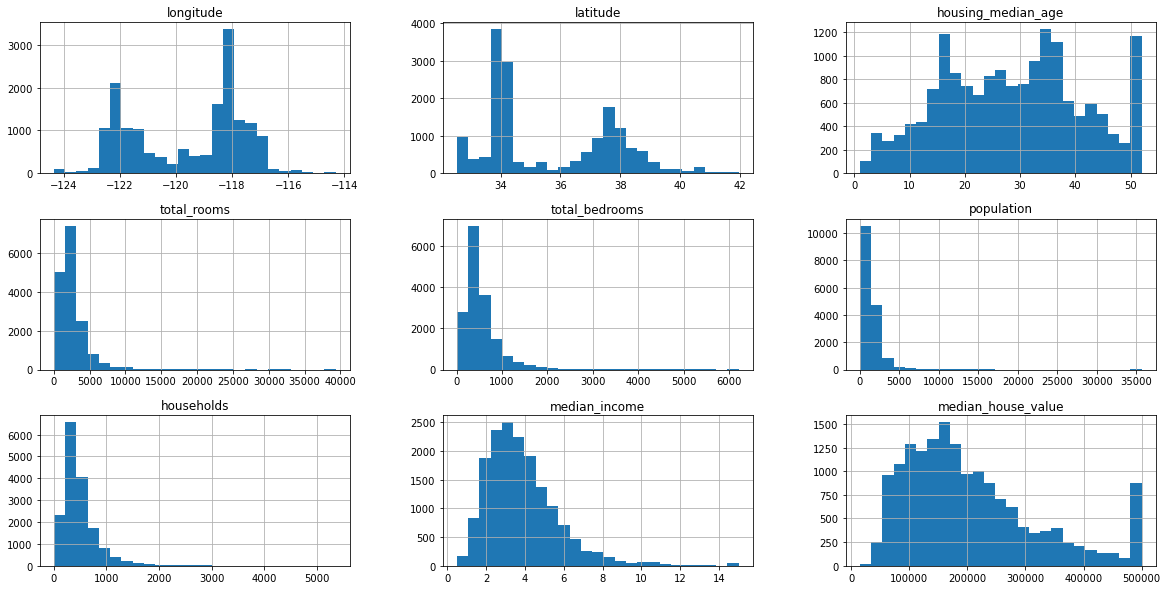

In [18]:
train_set.hist(bins=25, figsize=(20,10));

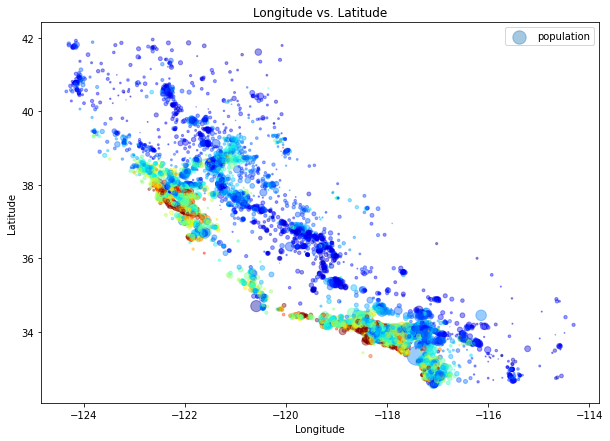

In [19]:
plt.figure(figsize=(10,7))
plt.scatter(train_set['longitude'], train_set['latitude'], s=train_set['population']/100,
           alpha=0.4, c=train_set['median_house_value'], cmap=plt.get_cmap('jet'),
           label='population')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Longitude vs. Latitude')
plt.legend()
plt.show()

In [20]:
corr_matrix = train_set.corr()

corr_matrix['median_house_value'].sort_values(ascending=False)

# plt.figure(figsize=(8,6))
# sns.heatmap(corr_matrix, annot=True, cbar=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

## Try to add some Features

In [21]:
# what about getting rooms_per_household 
# waht about ratio of bedrooms to totalrooms
# what about population per household

In [22]:
train_set['rooms_per_household'] = train_set['total_rooms'] / train_set['households']
train_set['bedroms_per_rooms'] = train_set['total_bedrooms'] / train_set['total_rooms']
train_set['population_per_household'] = train_set['population'] / train_set['households']

In [23]:
new_corr_matrix = train_set.corr()
new_corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedroms_per_rooms          -0.259984
Name: median_house_value, dtype: float64

In [24]:
# here we found that (rooms_per_household) & (bedroms_per_rooms) are great ....

In [25]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 17606 to 15775
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   longitude                 16512 non-null  float64
 1   latitude                  16512 non-null  float64
 2   housing_median_age        16512 non-null  float64
 3   total_rooms               16512 non-null  float64
 4   total_bedrooms            16354 non-null  float64
 5   population                16512 non-null  float64
 6   households                16512 non-null  float64
 7   median_income             16512 non-null  float64
 8   median_house_value        16512 non-null  float64
 9   ocean_proximity           16512 non-null  object 
 10  rooms_per_household       16512 non-null  float64
 11  bedroms_per_rooms         16354 non-null  float64
 12  population_per_household  16512 non-null  float64
dtypes: float64(12), object(1)
memory usage: 2.3+ MB


## Data Preparing

In [26]:
train_set_new = train_set.copy()

X_train_new = train_set_new.drop(columns=['median_house_value'], axis=1)
y_train_new = train_set_new['median_house_value']

In [27]:
num_cols = [cname for cname in  X_train_new.columns 
            if X_train_new[cname].dtype in ['float64', 'int64']]

cat_cols =  [cname for cname in  X_train_new.columns 
            if X_train_new[cname].dtype in ['object']]

print('num_cols => \n', num_cols)
print('=='*30)
print('cat_cols =>', cat_cols)

num_cols => 
 ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'rooms_per_household', 'bedroms_per_rooms', 'population_per_household']
cat_cols => ['ocean_proximity']


In [28]:
# imputing with median
my_imputer = SimpleImputer(strategy='median')
X_train_new[num_cols] = my_imputer.fit_transform(X_train_new[num_cols])

#########################################

# if you want to know what value algorithm use to fill na (median_each_columns)
median_cols = my_imputer.statistics_ 
print('algorithm use to fill na (median_each_columns) \n', median_cols)

algorithm use to fill na (median_each_columns) 
 [-1.18510000e+02  3.42600000e+01  2.90000000e+01  2.11950000e+03
  4.33000000e+02  1.16400000e+03  4.08000000e+02  3.54090000e+00
  5.23228423e+00  2.03031374e-01  2.81765270e+00]


In [29]:
X_train_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 17606 to 15775
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   longitude                 16512 non-null  float64
 1   latitude                  16512 non-null  float64
 2   housing_median_age        16512 non-null  float64
 3   total_rooms               16512 non-null  float64
 4   total_bedrooms            16512 non-null  float64
 5   population                16512 non-null  float64
 6   households                16512 non-null  float64
 7   median_income             16512 non-null  float64
 8   ocean_proximity           16512 non-null  object 
 9   rooms_per_household       16512 non-null  float64
 10  bedroms_per_rooms         16512 non-null  float64
 11  population_per_household  16512 non-null  float64
dtypes: float64(11), object(1)
memory usage: 2.1+ MB


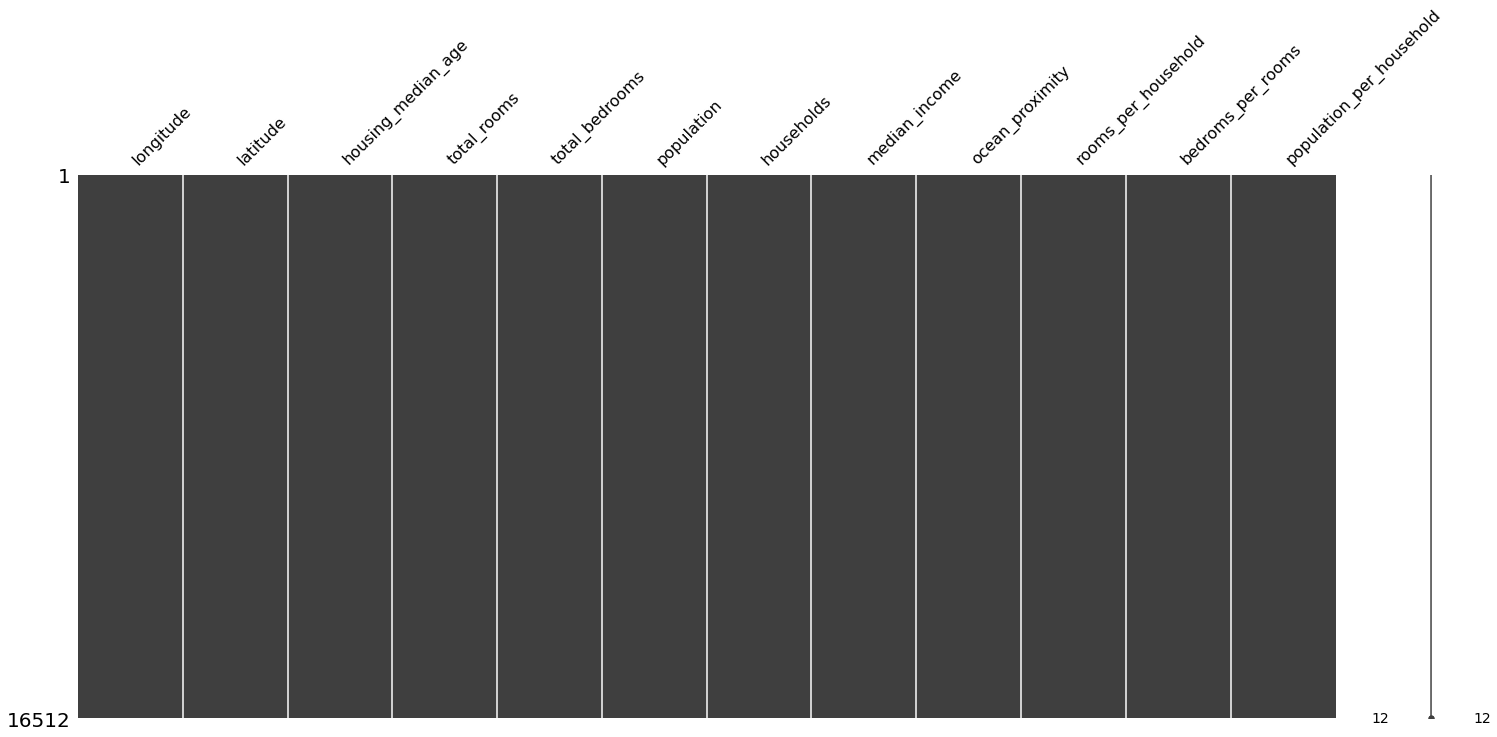

In [30]:
msn.matrix(X_train_new); # ok there is no nulls now

In [31]:
## Handle Categorical Data using OneHotEncoder

X_train_cat = X_train_new[['ocean_proximity']]

cat_encoder = OneHotEncoder()

train_cat_hot_encoded = cat_encoder.fit_transform(X_train_cat)

# it is sparse matrix ... convert it to array
train_cat_hot_encoded = train_cat_hot_encoded.toarray()

cols_names = ['name0', 'name1', 'name2', 'name3', 'name4']
train_cat_hot_encoded = pd.DataFrame(train_cat_hot_encoded, columns=cols_names)
train_cat_hot_encoded.head()


# print('train_cat_hot_encoded categories => \n', cat_encoder.categories_)


,name0,name1,name2,name3,name4
0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0


In [32]:
# get final dataframe 
X_train_final = pd.DataFrame(np.c_[X_train_new, train_cat_hot_encoded])

all_names = [*X_train_new.columns.values] + [*train_cat_hot_encoded.columns.values]

X_train_final.columns = all_names 

In [33]:
X_train_final = X_train_final.drop(columns=['ocean_proximity'], axis=1)

In [34]:
X_train_final.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,bedroms_per_rooms,population_per_household,name0,name1,name2,name3,name4
0,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,4.625369,0.223852,2.094395,1.0,0.0,0.0,0.0,0.0
1,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,6.00885,0.159057,2.707965,1.0,0.0,0.0,0.0,0.0
2,-117.2,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,4.225108,0.241291,2.025974,0.0,0.0,0.0,0.0,1.0
3,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,5.232295,0.200866,4.135977,0.0,1.0,0.0,0.0,0.0
4,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,4.50581,0.231341,3.047847,1.0,0.0,0.0,0.0,0.0


In [35]:
# now you can make some (standardization or Normalization)

# i will repeat all above steps and (standardization or Normalization)
# using PipeLine & ColumnTRansformer

### Using Pipeline & ColumnTransfomer

In [36]:
# copy  of the original one
housing_train = train_set.copy()
X_housing_train = housing_train.drop(columns=['median_house_value'], axis=1)
y_housing_train = housing_train['median_house_value']

In [37]:
# numerical
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('std_scalar', StandardScaler())
])

# total numerical and categorical using ColuneTransformer
full_pipeline = ColumnTransformer([
    ('numerical', num_pipeline, num_cols),
    ('categorical', OneHotEncoder(), cat_cols)
])

In [38]:
X_housing_train = full_pipeline.fit_transform(X_housing_train)


In [39]:
X_housing_train = pd.DataFrame(X_housing_train)

In [40]:
full_pipeline

ColumnTransformer(transformers=[('numerical',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('std_scalar',
                                                  StandardScaler())]),
                                 ['longitude', 'latitude', 'housing_median_age',
                                  'total_rooms', 'total_bedrooms', 'population',
                                  'households', 'median_income',
                                  'rooms_per_household', 'bedroms_per_rooms',
                                  'population_per_household']),
                                ('categorical', OneHotEncoder(),
                                 ['ocean_proximity'])])

In [41]:
num_cols_pipeline = ['longitude', 'latitude', 'housing_median_age',
                                  'total_rooms', 'total_bedrooms', 'population',
                                  'households', 'median_income',
                                  'rooms_per_household', 'bedroms_per_rooms',
                                  'population_per_household']

cat_cols_pipeline = ['ocean0', 'ocean1', 'ocean2', 'ocean3', 'ocean4']

X_housing_train.columns = num_cols_pipeline + cat_cols_pipeline

In [42]:
X_housing_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,bedroms_per_rooms,population_per_household,ocean0,ocean1,ocean2,ocean3,ocean4
0,-1.156043,0.771950,0.743331,-0.493234,-0.445438,-0.636211,-0.420698,-0.614937,-0.312055,0.193805,-0.086499,1.0,0.0,0.0,0.0,0.0
1,-1.176025,0.659695,-1.165317,-0.908967,-1.036928,-0.998331,-1.022227,1.336459,0.217683,-0.940745,-0.033534,1.0,0.0,0.0,0.0,0.0
2,1.186849,-1.342183,0.186642,-0.313660,-0.153345,-0.433639,-0.093318,-0.532046,-0.465315,0.499160,-0.092405,0.0,0.0,0.0,0.0,1.0
3,-0.017068,0.313576,-0.290520,-0.362762,-0.396756,0.036041,-0.383436,-1.045566,-0.079661,-0.208675,0.089736,0.0,1.0,0.0,0.0,0.0
4,0.492474,-0.659299,-0.926736,1.856193,2.412211,2.724154,2.570975,-0.441437,-0.357834,0.324937,-0.004194,1.0,0.0,0.0,0.0,0.0


## Train the Model

#### LinearRegression

In [43]:
lin_reg = LinearRegression()
lin_reg.fit(X_housing_train, y_housing_train)

LinearRegression()

In [44]:
some_data = X_housing_train.iloc[:5]   # already pipedline
y_true = y_housing_train.iloc[:5]

In [45]:
lin_reg_pred_y = lin_reg.predict(some_data)

In [46]:
lin_reg_rms = (mean_squared_error(y_true, lin_reg_pred_y))**0.5
print('lin_reg_rms =>', lin_reg_rms)

lin_reg_rms => 48854.8917533481


#### Decision Tree

In [47]:
tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_housing_train, y_housing_train)

DecisionTreeRegressor()

In [48]:
tree_reg_pred_y =  tree_reg.predict(some_data)

In [49]:
tree_reg_rms = (mean_squared_error(y_true, tree_reg_pred_y))**0.5
print('tree_reg_rms =>', tree_reg_rms)

tree_reg_rms => 0.0


### Using Cross Validation

#### Linear Regression

In [50]:
lin_reg = LinearRegression()

# log transform
y_housing_train_log = np.log1p(y_housing_train)

lin_reg.fit(X_housing_train, y_housing_train_log)

y_log = lin_reg.predict(X_housing_train)

# return
y_lin_reg = np.expm1(y_log)

rmse = (mean_squared_error(y_housing_train, y_lin_reg))**0.5
rmsle = (mean_squared_log_error(y_housing_train, y_lin_reg))**0.5

print('rmse =>', rmse)
print('rmsle =>', rmsle)

reg_scores = cross_val_score(lin_reg, X_housing_train, y_housing_train_log, 
                cv=10, scoring='neg_mean_squared_log_error')


reg_scores = -reg_scores

# return
reg_scores = np.expm1(reg_scores)

rmsle_cross = (reg_scores**0.5).mean()

print('rmsle_cross =>', rmsle_cross)


# reg_scores = -reg_scores
# reg_scores = (reg_scores)**0.5
# print('mean', reg_scores.mean())
# print('std', reg_scores.std())

rmse => 87993.33428106444
rmsle => 0.32718847796880746
rmsle_cross => 0.025262719425438607


<AxesSubplot:>

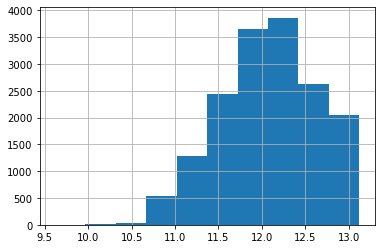

In [51]:
y_housing_train_log.hist()

#### Random Forest

In [52]:
forest_reg = RandomForestRegressor(n_estimators=100, max_depth=7) 

# log transform
y_housing_train_log = np.log1p(y_housing_train)

forest_reg.fit(X_housing_train, y_housing_train_log)

y_log_forest = forest_reg.predict(X_housing_train)

# return
y_pred_forest = np.expm1(y_log_forest)

rmse_forest = (mean_squared_error(y_housing_train, y_pred_forest))**0.5
rmsle_forest = (mean_squared_log_error(y_housing_train, y_pred_forest))**0.5

print('rmse_forest =>', rmse_forest)
print('rmsle_forest =>', rmsle_forest)

forest_scores = cross_val_score(forest_reg, X_housing_train, y_housing_train_log, 
                cv=10, scoring='neg_mean_squared_log_error')


forest_scores = -forest_scores

# return
forest_scores = np.expm1(forest_scores)

rmsle_cross = (forest_scores**0.5).mean()

print('rmsle_cross =>', rmsle_cross)


# reg_scores = -reg_scores
# reg_scores = (reg_scores)**0.5
# print('mean', reg_scores.mean())
# print('std', reg_scores.std())

rmse_forest => 55444.5827076517
rmsle_forest => 0.2525720512511504
rmsle_cross => 0.020747519720918088


### Using Random forest 

root mean squred error ,test for overfitting

In [53]:
forest = RandomForestRegressor()
forest.fit(X_housing_train, y_housing_train)
y_pred_forest = forest.predict(X_housing_train)

rmse_forest = (mean_squared_error(y_housing_train, y_pred_forest))**0.5
print('rmse_forest =>', rmse_forest)

rmse_forest => 18633.980616084104


In [54]:
# using cross valuidation
cross_forest = cross_val_score(forest, X_housing_train, y_housing_train, cv=10,
                              scoring='neg_mean_squared_error')

cross_forest = np.sqrt(-cross_forest)
print('cross_forest scores (mean) =>', cross_forest.mean())
print('cross_forest scores (std) =>', cross_forest.std())

cross_forest scores (mean) => 50108.00483394178
cross_forest scores (std) => 1812.8173841572952


In [55]:
## there is an overfitting as shown above two cells

## Tune Model (RandomForest)

In [56]:
parms_test = {'n_estimators':[10,25,35,40], 'max_features':[2,4,6,8], 'bootstrap':[False]}

grid_search = GridSearchCV(estimator=forest, param_grid=parms_test, cv=5, 
                           scoring='neg_mean_squared_error', n_jobs=-1,
                          return_train_score=True)

In [57]:
grid_search.fit(X_housing_train, y_housing_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [False], 'max_features': [2, 4, 6, 8],
                         'n_estimators': [10, 25, 35, 40]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [58]:
# get best model hypr-parameters
best_model = grid_search.best_estimator_

In [59]:
# get best scores

score_best = grid_search.best_score_
score_best = np.sqrt(-score_best)

print('score_best after Tuning => ', score_best)

print('==='*30)

cvres = grid_search.cv_results_
for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
    print(np.sqrt(-mean_score), params)

score_best after Tuning =>  48875.85574081665
54926.208838444974 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
52122.69155975183 {'bootstrap': False, 'max_features': 2, 'n_estimators': 25}
51560.56731136817 {'bootstrap': False, 'max_features': 2, 'n_estimators': 35}
51537.428441217846 {'bootstrap': False, 'max_features': 2, 'n_estimators': 40}
51761.055200987954 {'bootstrap': False, 'max_features': 4, 'n_estimators': 10}
49905.772862905214 {'bootstrap': False, 'max_features': 4, 'n_estimators': 25}
49450.042770685264 {'bootstrap': False, 'max_features': 4, 'n_estimators': 35}
49495.95086967757 {'bootstrap': False, 'max_features': 4, 'n_estimators': 40}
51100.419370169955 {'bootstrap': False, 'max_features': 6, 'n_estimators': 10}
49159.12334447737 {'bootstrap': False, 'max_features': 6, 'n_estimators': 25}
49084.0438938671 {'bootstrap': False, 'max_features': 6, 'n_estimators': 35}
48875.85574081665 {'bootstrap': False, 'max_features': 6, 'n_estimators': 40}
51371.0295399

In [60]:
# get best features

features_importance = best_model.feature_importances_

print('features_importance => \n', features_importance)
# then how to get their names

features_importance => 
 [8.77688077e-02 7.94948433e-02 4.06326997e-02 1.61844114e-02
 1.60030593e-02 1.67891667e-02 1.52360811e-02 3.35942797e-01
 4.83373592e-02 7.43746720e-02 1.02931678e-01 1.01462219e-02
 1.48788859e-01 5.15724567e-05 3.11768278e-03 4.20008939e-03]


In [61]:
names = X_housing_train.columns

In [62]:
sorted([*zip(features_importance, names)], reverse=True)

[(0.3359427965417058, 'median_income'),
 (0.14878885873009576, 'ocean1'),
 (0.10293167769399522, 'population_per_household'),
 (0.08776880771209175, 'longitude'),
 (0.07949484328779599, 'latitude'),
 (0.07437467200968041, 'bedroms_per_rooms'),
 (0.0483373592156207, 'rooms_per_household'),
 (0.04063269969238057, 'housing_median_age'),
 (0.016789166748901678, 'population'),
 (0.016184411415290475, 'total_rooms'),
 (0.01600305931272882, 'total_bedrooms'),
 (0.015236081120258585, 'households'),
 (0.010146221888431207, 'ocean0'),
 (0.004200089389397871, 'ocean4'),
 (0.0031176827849090398, 'ocean3'),
 (5.157245671616301e-05, 'ocean2')]

## Evaluate on Test Data

In [63]:
test_set_new = test_set.copy()
test_set_new.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
5241,-118.39,34.12,29.0,6447.0,1012.0,2184.0,960.0,8.2816,500001.0,<1H OCEAN
10970,-117.86,33.77,39.0,4159.0,655.0,1669.0,651.0,4.6111,240300.0,<1H OCEAN
20351,-119.05,34.21,27.0,4357.0,926.0,2110.0,876.0,3.0119,218200.0,<1H OCEAN
6568,-118.15,34.20,52.0,1786.0,306.0,1018.0,322.0,4.1518,182100.0,INLAND
13285,-117.68,34.07,32.0,1775.0,314.0,1067.0,302.0,4.0375,121300.0,INLAND


In [64]:
X_test = test_set_new.drop(columns=['median_house_value'], axis=1)
y_test = test_set_new['median_house_value']



In [65]:
# adding features like we do above

X_test['rooms_per_household'] = X_test['total_rooms'] / X_test['households']
X_test['bedroms_per_rooms'] = X_test['total_bedrooms'] / X_test['total_rooms']
X_test['population_per_household'] = X_test['population'] / X_test['households']


In [66]:
X_test.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,bedroms_per_rooms,population_per_household
5241,-118.39,34.12,29.0,6447.0,1012.0,2184.0,960.0,8.2816,<1H OCEAN,6.715625,0.156972,2.275000
10970,-117.86,33.77,39.0,4159.0,655.0,1669.0,651.0,4.6111,<1H OCEAN,6.388633,0.157490,2.563748
20351,-119.05,34.21,27.0,4357.0,926.0,2110.0,876.0,3.0119,<1H OCEAN,4.973744,0.212532,2.408676
6568,-118.15,34.20,52.0,1786.0,306.0,1018.0,322.0,4.1518,INLAND,5.546584,0.171333,3.161491
13285,-117.68,34.07,32.0,1775.0,314.0,1067.0,302.0,4.0375,INLAND,5.877483,0.176901,3.533113


In [67]:
X_test = full_pipeline.transform(X_test)

In [68]:
X_test = pd.DataFrame(X_test)
X_test.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.592384,-0.710749,0.027588,1.788385,1.163511,0.684989,1.232174,2.312998,0.488309,-0.977257,-0.070908,1.0,0.0,0.0,0.0,0.0
1,0.857146,-0.874454,0.822858,0.718423,0.294532,0.223375,0.409730,0.386117,0.363103,-0.968195,-0.045983,1.0,0.0,0.0,0.0,0.0
2,0.262681,-0.668654,-0.131466,0.811016,0.954177,0.618660,1.008597,-0.453406,-0.178661,-0.004416,-0.059369,1.0,0.0,0.0,0.0,0.0
3,0.712276,-0.673331,1.856709,-0.391288,-0.554973,-0.360140,-0.465946,0.145001,0.040681,-0.725808,0.005616,0.0,1.0,0.0,0.0,0.0
4,0.947065,-0.734136,0.266169,-0.396432,-0.535500,-0.316219,-0.519179,0.084997,0.167383,-0.628298,0.037695,0.0,1.0,0.0,0.0,0.0


In [69]:
num_cols_pipeline = ['longitude', 'latitude', 'housing_median_age',
                                  'total_rooms', 'total_bedrooms', 'population',
                                  'households', 'median_income',
                                  'rooms_per_household', 'bedroms_per_rooms',
                                  'population_per_household']

cat_cols_pipeline = ['ocean0', 'ocean1', 'ocean2', 'ocean3', 'ocean4']

X_test.columns = num_cols_pipeline + cat_cols_pipeline

In [70]:
X_test.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,bedroms_per_rooms,population_per_household,ocean0,ocean1,ocean2,ocean3,ocean4
0,0.592384,-0.710749,0.027588,1.788385,1.163511,0.684989,1.232174,2.312998,0.488309,-0.977257,-0.070908,1.0,0.0,0.0,0.0,0.0
1,0.857146,-0.874454,0.822858,0.718423,0.294532,0.223375,0.409730,0.386117,0.363103,-0.968195,-0.045983,1.0,0.0,0.0,0.0,0.0
2,0.262681,-0.668654,-0.131466,0.811016,0.954177,0.618660,1.008597,-0.453406,-0.178661,-0.004416,-0.059369,1.0,0.0,0.0,0.0,0.0
3,0.712276,-0.673331,1.856709,-0.391288,-0.554973,-0.360140,-0.465946,0.145001,0.040681,-0.725808,0.005616,0.0,1.0,0.0,0.0,0.0
4,0.947065,-0.734136,0.266169,-0.396432,-0.535500,-0.316219,-0.519179,0.084997,0.167383,-0.628298,0.037695,0.0,1.0,0.0,0.0,0.0


### Prediction

In [71]:
y_predict = best_model.predict(X_test)

In [72]:
rmse_test = (mean_squared_error(y_test, y_predict))**0.5

print('rmse_test =>', rmse_test)

rmse_test => 46210.052061316776


### Percentile

In [73]:
confidence = 0.95
squared_errors = (y_predict - y_test)**2
np.sqrt(stats.t.interval(confidence, len(squared_errors)-1,
                        loc=squared_errors.mean(),
                        scale=stats.sem(squared_errors)))

array([44175.26707335, 48158.9410392 ])